In [1]:
'''
The purpose of this code is to classify legal text by type.

Types include:
1.) Complaint
2.) Order
3.) Summary judgement
4.) Cover sheet.
'''




'\nThe purpose of this code is to classify legal text by type.\n\nTypes include:\n1.) Complaint\n2.) Order\n3.) Summary judgement\n4.) Cover sheet.\n'

In [ ]:
# IMPORT PACKAGES

In [29]:
import nltk
import os
import re
import sys

In [ ]:
# DEFINE TARGET DIRECTORY

In [88]:
'''Note:    The target directory should be changed by the user to point to the directory within which they have saved their
            text files'''

os.chdir(r'I:\Legal Analytics Sprint-S18\Team Folders\Team Wang\Files Converted to Txt')
Dir_list = os.listdir(r'I:\Legal Analytics Sprint-S18\Team Folders\Team Wang\Files Converted to Txt')

In [ ]:
# IMPORT CLEANING FUNCTIONS

In [157]:
'''Note:    These are the cleaning modules that were created to clean the text of obvious errors or words that will likely 
            not be material to our ultimate analysis.
            These functions constitute the underlying code for the subsequent text-cleaning pipeline program that is used 
            in the ultimate code (see end of document)'''

def clean_text_4_classification_remove_backslashes(Text_file):
    '''The purpose of this function is to clean the text files of numerous instances of backslashes 
    in order to prepare them for the regex expression search. 
    Input  =   Single text file 
    Output =   Single text file cleaned 
    '''
    
    # Convert text to lowercase
    Text_file_lower = Text_file.lower()
    
    # Split any values in the text on the backslash.  The Text_split_slash should return a list. 
    Text_split_slash = Text_file_lower.split('\\')
        
    # Return the list to a text. 
    Text_rejoined = ' '.join(Text_split_slash)
                
    # Return a list of the cleaned text docs. 
    return Text_rejoined


def clean_text_4_classification_remove_nABC(Text_file):
    '''The purpose of this function is to remove the 'n' that appears before words that begin with an upper case letter.  
    Input  =   Single txt file
    Output =   Clean list of tokens from original txt file
    '''
    # Define the regex expression that you want to search for. 
    Regex_exp = re.compile('n[A-Z*]')
    
    # Create a list to capture the tokens once they are cleaned 
    Text_tokenized_cleaned = []
            
    # Tokenize the given text
    Text_tokenized = nltk.word_tokenize(Text_file)
            
    # Run for loop over tokens for a given text. 
    for token in Text_tokenized:

        # Search for the regex expression
        Regex_search = re.search(Regex_exp, token)
                
        # Test if there was match (None = no match)
        if Regex_search != None:
                     
            # If there was a match, take all letters after the 'n'.   
            token_cleaned = token[1:]
                    
            Text_tokenized_cleaned.append(token_cleaned)
                        
        # If the Regex_search returned None, return the token back to the Text_tokenized_cleaned list
        else:
            Text_tokenized_cleaned.append(token)
    
    # Return a list of clean tokens
    return Text_tokenized_cleaned



def create_dict_punct():
    '''The purpose of this function is to simply create a dictionary of punctuation symbols to use
    in other functions
    Input  = None
    Output = Dict whose keys are the distinct punctuation marks. 
    '''
    import string
    Dict = {}
    Punct = string.punctuation
    for x in Punct:
        Dict[x] = ''
    return Dict 

def strip_punctuation(Token_list):
    '''The purpose of this function is to strip the punctuation from a list of tokens. 
    Input  =  List of tokens
    Output =  List of tokens absent punctuation.  
    '''
    # Import punctuation dictionary
    Dict_punct = create_dict_punct()

    # Create a list to capture the cleaned tokens
    Clean_token_list = []    
        
    # Iterate over the tokens in the txt file
    for x in Token_list:
        if x not in Dict_punct:
            # Append tokens to clean token list
            Clean_token_list.append(x)
    
    # Return a list of cleaned text
    return Clean_token_list

def strip_two_letter_words(Token_list):
    '''The purpose of this function is to remove any two letter tokens from a list of tokens.
    Input  =   List of tokens
    Output =   List of tokens absent two letter words'''
    
    List = [x for x in Token_list if len(x) > 2]
    
    return List

def create_dict_stopwords():
    '''The purpose of this code is to create a dictionary of stop words. 
    Input  = None
    Output = Dictionary of stop words'''
    
    from nltk.corpus import stopwords
    Stopwords = stopwords.words('english')                  
    Dict = {}
    for x in Stopwords:
        Dict[x] = ''
    return Dict

def strip_stop_words(Token_list):
    ''' The purpose of this code is to strip the stop words from a given text
    Input  = List of tokens 
    Outpu  = Text clean of stop words'''
    
    stop_words = create_dict_stopwords()
    List = []
    for x in Token_list:
        if x not in stop_words:
            List.append(x)
    return List

def create_Concatenated_text_file(Dir_list, New_file_name):     
    # Create new write file
    New_File = open(str(New_file_name) + '.txt','w')
    
    # Identify text files to retreive
    Text_files = (file for file in Dir_list if 'txt.' in file)  # attempt to use a generator. 

    # Create Loop Through List of Directories
    for x in Text_files:
        File = open(x, 'rb')
        Text = File.read()
        
        # Write files to new file
        New_File.write(str(Text))
        New_File.write('\n')
    # Close File
    New_File.close()

def write_to_text_file(Text_2_write, File_name2_use):
    file = open(str(File_name2_use) + '.txt', 'w')    
    file.write(Text_2_write)   

    
def get_cleaned_concatenated_text_file(Dir_list):
    '''
    Input  = List of files in the directory
    Output = Cleaned text 
    
    '''
    # Note, the author assumes there is only one Concat file in the dir.  Since the order of the files in the dir
    # can change, the better approach is to identify it using a list comprehension with an if statement. 
    Dirty_text_loc = (file for file in Dir_list if 'Concatenated' in file)
       
    Concat_file = next(Dirty_text_loc)      
    File = open(Concat_file)
    # Read in dirty text
    Text_dirty = File.read()
    # Run cleaning pipeline
    Clean_text = text_clearning_pipeline_Input_4_Error_Checker_Function(Text_dirty)
    
    # Return cleaned text
    return Clean_text


def create_Wordnet_set():
    '''The purpose of this function is to create a set of all words from the wordnet dictionary.
    Input  = None
    Output = Set object of all words. 
    '''
    # Import words from wordnet
    from nltk.corpus import wordnet as wn
    Words = wn.words()

    # Create List to capture words  
    List_dict_words = []; [List_dict_words.append(x) for x in Words]
    
    # Create Set
    Set_dict_words = set(List_dict_words)
    
    # Return Set
    return Set_dict_words

def get_set_from_text(Dir_list):
    '''The purpose of this code is to create a set of unique tokens from a text file as a string object. 
    Input  =  Text file as a string object 
    Output =  Set of unique tokens. 
    '''
    # Define Set Object
    Create_set = ''
    
    # Obtain Your Target File
    Target_file = (file for file in Dir_list if 'Cleaned' in file)
    
    # Loop over Target_file since it is a generator object. 
    Concat_file = next(Target_file)
    File = open(Concat_file)
    Text = File.read()
    # Tokenize Text
    Text_tokenized = nltk.word_tokenize(Text)
    # Create Set
    Create_set = set(Text_tokenized)
    # Return Set
    return Create_set


def correct_tokens_nABC_using_wordnet_dict(Token_list):
    '''The purpose of this code is to '''
    
    # Creat a clean list of tokens to return to the user. 
    Token_list_cleaned = []
    
    # Convert tokens to lowercase
    Token_list_lower = [x.lower() for x in Token_list]
    
    # Loop over the list of tokens
    for token in Token_list_lower:
        # Find the tokens that start with an 'n'
        if token[0] == 'n':
            # See if the token is in the WordNet Dict when the 'n' is dropped
            if token[1:] in Wordnet_set:
                # If the token is in the dictionary, append the token without the 'n'
                Token_list_cleaned.append(token[1:])
            else:
                # If not, then just append the token as there was no matching word. 
                Token_list_cleaned.append(token)
                
        # If the token does not start with an 'n', then this code does not apply and append back to the list. 
        else:
            Token_list_cleaned.append(token)
    
    return Token_list_cleaned

In [ ]:
# CREATE TEXT CLEANING PIPELINE

In [139]:
'''This pipeline will be placed inside a larger function that loops over the Target Directory, identifies the text files,
    opens them, etc, and also captures the target file, tokenized text and statistics.  We'll need to create these 
    variables within the master function. 
'''

def text_clearning_pipeline_Input_4_Error_Checker_Function(Text_file):
    '''The purpose of this function is to prepare text for use with the Error Checker Program
    Input  =  Single text file
    Output =  List of clean tokens representing a single text. 
    '''
    # Run Clearning Pipeline (These functions are taken from the ones define above)
    txt_strip_backslashes = clean_text_4_classification_remove_backslashes(Text_file)
    txt_strip_nABC = clean_text_4_classification_remove_nABC(txt_strip_backslashes)
    txt_strip_punct = strip_punctuation(txt_strip_nABC)
    txt_strip_2_letter_words = strip_two_letter_words(txt_strip_punct)
    txt_strip_stop_words = strip_stop_words(txt_strip_2_letter_words)
    txt_correct_nABC_using_wordnet = correct_tokens_nABC_using_wordnet_dict(txt_strip_stop_words)
    
    # Rejoin the tokens into a text so that we can write the text to a file.  This way we don't need to run this 
    # code everytime we want to work with the cleaned text. 
    Text_rejoined = ' '.join(txt_correct_nABC_using_wordnet)
    
    # Return List of clean tokenized text
    return Text_rejoined
    

In [ ]:
# CONCATENATE TEXT FILES

In [136]:
'''The purpose of this code is to concatenate all of the text files in the target directory'''

create_Concatenated_text_file(Dir_list, 'Concatenated Text File - Cleaned')

'The purpose of this code is to concatenate all of the text files in the target directory'

In [9]:
# CLEAN DIRTY CONCATENATED FILE

In [140]:
'''The prupose of this code is to run the Dirty Concatenated text throught the text cleaning pipeline'''

Cleaned_concatenated_txt_file = get_cleaned_concatenated_text_file(Dir_list)

In [ ]:
# WRITE CLEANED TEXT TO TEXT FILE

In [142]:
write_to_text_file(Cleaned_concatenated_txt_file, 'Concatenated Text File - Cleaned')

In [ ]:
# CREATE A SET OF THE WORDS FOUND IN THE CONCATENATED TEXT FILE

In [158]:
Set_concat_text = get_set_from_text(Dir_list)

In [121]:
# GET FREQUENCY DISTRIBUTION OF WORDS IN SET BY TEXT

In [ ]:
# TEST TEXT CLEARNING PIPELINE (Feel free to test the code on a single text file)

In [12]:
File = Target_dir[1]
File_open = open(File, 'rb')
Text_bytes = File_open.read()
Text_str = str(Text_bytes)
Text_tokens_cleaned = text_clearning_pipeline_Input_4_Error_Checker_Function(Text_str)
Text_tokens_cleaned

In [ ]:
# ERROR CHECKER FUNCTION

In [ ]:
import os
import nltk
from nltk.corpus import wordnet as wn
import sys

In [ ]:
# CREATE A SET OF WORDS FROM THE WORDNET DICTIONARY

In [13]:
def create_Set_wordnet_dict():
    '''The purpose of this function is to create a set of all words from the wordnet dictionary.
    Input  = None
    Output = Set object of all words. Note that the author chose to use a set as it is supposed to be faster than 
             iterating over a list. 
    '''
    # Import words from wordnet
    from nltk.corpus import wordnet as wn
    Words = wn.words()

    # Create List to capture words  
    List_dict_words = []; [List_dict_words.append(x) for x in Words]
    
    # Create Set
    Set_dict_words = set(List_dict_words)
    
    # Return Set
    return Set_dict_words

In [14]:
# CREATE ERROR FUNCTION

In [15]:
def get_Error_Percentage_Per_Document(Tokenized_text_list_tokens):
    '''The purpose of this function is to count the tokens in a given text that do not match a word in the Wordnet Dict
    Input  = List of tokens
    Ouput  = Float that represents the percentage of error in the documents  
    
    Note:  The final function will map the error percentage to the document name. 
    '''
    
    # Create Set of dictionary words
    Word_set = create_Set_wordnet_dict()
    
    # Create Counter & Calc Num of total tokens 
    Num_tokens = len(Tokenized_text_list_tokens)
    Count_false = 0
    
    # Loop over list to unpack tokenz
    for token in Tokenized_text_list_tokens:
        
    # Check to see if token in Word_set
        if token not in Word_set:
            # if token in set
            Count_false += 1
        
    # Error percentage is the Num of Errors / Total tokens * 100. 
    Error_percentage = round(((Count_false / Num_tokens)*100), 2)
    
    # Return Error_percentage_value 
    return Error_percentage
    

In [18]:
# Test Function on a single text

get_Error_Percentage_Per_Document(Text_tokens_cleaned)

51.58

In [ ]:
# CREATE ERROR FREQUENCY DISTRIBUTION

In [50]:
def get_Error_Frequency_Distribution(Tokenized_text_list_tokens, Obj_is_list_of_lists = '', Graph = ''):
    '''The purpose of this function is generate a frequency distribution of errors for as many tokenized text files as are
    passed to the function.  
    Input  = a.) Tokenized_text =  Pass a text that has been tokenized. 
             b.) Obj_is_list =     If a object passed is a list of text, set List_of_texts to True.  
                                   Otherwise, defaults to False
             c.) Graph =           You can choose to visualize the results as a graph or not. 
    
    Ouput  = a.) Pandas dataframe whose 'key' is the error and 'values' count that this error appears in teh text. 
             b.) You can also chose to display the dataframe as graph. 
    '''
        
    # Create Set of dictionary words
    Word_set = create_Set_wordnet_dict()
    
    # Create Dictionary to Capture Errors (keys) and Count (values)
    Error_Freq_Dist_dict = {}
    
    # Check if List_of_texts True
    if Obj_is_list_of_lists is False:
    
        # Loop over list to unpack tokens
        for token in Tokenized_text_list_tokens:
            
            # Check to see if token in Word_set
            if token not in Word_set:
                Error_Freq_Dist_dict[token] = Error_Freq_Dist_dict.get(token, 0) +1
    else:
        # Loop over list of texts:
        for token_list in Tokenized_text_list_tokens:
            
            # Loop over list to unpack tokens
            for token in token_list:
            
                # Check to see if token in Word_set
                if token not in Word_set:
                    
                    Error_Freq_Dist_dict[token] = Error_Freq_Dist_dict.get(token, 0) +1

    # Create Pandas Dataframe
    import pandas as pd, matplotlib.pyplot as plt
    Index = [1]
    df = pd.DataFrame(Error_Freq_Dist_dict, index = Index)
    df_tp = pd.DataFrame.transpose(df)
    df_sorted = df_tp.sort_values(1, ascending = False)
                    
    # Return a Bar graph if Graph = True
    if Graph == True:
        graph = df_sorted.plot(kind = 'bar')
        return plt.show()
    
    # Otherwise, return a dataframe. 
    else:
        # Return Error_percentage_value 
        return df_sorted
    

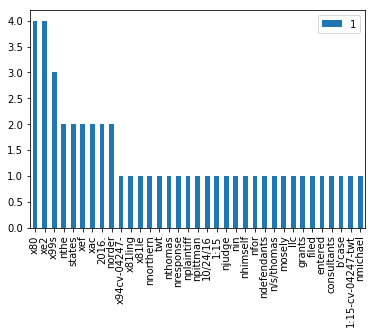

In [51]:
# Test Code

get_Error_Frequency_Distribution(Text_tokens_cleaned, Obj_is_list_of_lists= False, Graph = True)

In [ ]:
# FINAL PIPELINE CODE FOR THIS PROGRAM

In [ ]:
def Error_Checker_PDF_2_TXT(Target_dir, Get_Error_Percentage_Per_Doc = '', Get_Freq_Dist_Errors_All_Docs = '', Graph = ''):
    '''
    Input  =    Target directory     =    Input the target directory (obj or string) where the text files are saved. 
                                          Set a slicer if you  want to limit the files from the Target_dir. 
                Get_Error_Percentage =    Set this option to True if you want to obtain a dataframe of the Error % per 
                                          text file. 
                Get_Freq_Dist_Errors =    Set this option to True if you want to obtain a dataframe with the frequency of 
                                          errors for the text files that are in your target directory. 
                
                Note:  You can only set one of the two functions to True.  
                
    Output =    This function allows the user to choose which of the two functions to run a. Error % or Freq_Dist.
                The user may also chose to display the dataframe returned from the Get_Freq_Dist function as a graph. 
    '''
    
    # Create Lists And Objects to Capture Values Generated From the Subjecuent Functions
    List_Text_files_cleaned = []
    List_Text_file_names = []
    Dict_filename_error_percentage = {}
    Error_Freq_Distr = ''
    
    # Get Text Files in Dir Only
    get_txt_files_only_in_dir = [file for file in Target_dir if '.txt' in file]
    
    
    # Loop over directory, Identify Text Documents, Open+Read Text Documents
    for File in get_txt_files_only_in_dir:
        
        # Convert Files to Text & Append Text to List
        File_open = open(File, 'rb')
        Text_bytes = File_open.read()
        Text_str = str(Text_bytes)
        
        
        # FUNCTION #1 - TEXT CLEARNING PIPELINE
        
        get_cleaned_text_tokenized = text_clearning_pipeline_Input_4_Error_Checker_Function(Text_str)
        
        # Append Cleaned Text to List to be used for the Get Frequency Distribution Function. 
        List_Text_files_cleaned.append(get_cleaned_text_tokenized)
        
        
        # FUNCTION #2:  GET ERROR PERCENTAGE PER DOC
        
        # Only run this function only if the input is set to 'True'
        if Get_Error_Percentage_Per_Doc == True:
            
            # Import Error Function
            get_file_error_percentage = get_Error_Percentage_Per_Document(get_cleaned_text_tokenized)
            get_file_name = str(File)
        
            # Create Dictionary File Name + Error %
            Dict_filename_error_percentage[get_file_name] = get_file_error_percentage
    
    
        # FUNCTION #3: GET FREQUENCY DISTRIBUTION OF ERRORS FOR ALL DOCS
        
        # Only run this function is the input is set to 'True'
        if Get_Freq_Dist_Errors_All_Docs == True:
            
            # Import Error Freq Distribution Function           
            Error_Freq_Distr = get_Error_Frequency_Distribution(List_Text_files_cleaned, 
                                                                Obj_is_list_of_lists= True, 
                                                                Graph = Graph)
                                                                #Graph = Graph so that this sub function pulls from the
                                                                         #input set in the main function
    # DETERMINE WHICH OUTPUT TO RETURN TO THE USER
    
    if Get_Error_Percentage_Per_Doc == True:
        
        return Dict_filename_error_percentage
    
    elif Get_Freq_Dist_Errors_All_Docs == True and Graph == False:
        
            return Error_Freq_Distr
    
    elif Get_Freq_Dist_Errors_All_Docs == True and Graph == True:
    
            Error_Freq_Distr.plot(kind = 'bar')
            return plt.show()
    
    return None
    

In [76]:
# Test Code

Error_Checker_PDF_2_TXT(Target_dir, 
                        Get_Error_Percentage_Per_Doc= False, 
                        Get_Freq_Dist_Errors_All_Docs= True, 
                        Graph = False)

,1
x80,695
xe2,695
x99s,133
filed,133
xc2,129
x9d,128
nplaintiff,116
xef,110
xac,110
xa7,107
